In [102]:
'''
    Importing the data from the ROOT files
    All root data files can be obtained through the open data 
    program from the ATLAS collaboration. 
    They can be found here:
        http://opendata.atlas.cern/samples-13tev/
    All data files are in root format and require 
    the installation of ROOT's python interface. 
    ROOT is a CERN C++ Library which can be found here:
        https://root.cern.ch/
'''

import numpy as np
import ROOT
from ROOT import TMath
from DataLoader import LoadDataAndProcess

ttH = ROOT.TFile.Open("mc_341081.ttH125_gamgam.GamGam.root")
ggH = ROOT.TFile.Open("mc_343981.ggH125_gamgam.GamGam.root")
WWH = ROOT.TFile.Open("mc_345041.VBFH125_gamgam.GamGam.root")
data1 = ROOT.TFile.Open("data_A.GamGam.root")
data2 = ROOT.TFile.Open("data_B.GamGam.root")
data3 = ROOT.TFile.Open("data_C.GamGam.root")
data4 = ROOT.TFile.Open("data_D.GamGam.root")

# Channel Dictionary
Channels = {"ttH":ttH.Get("mini"),
            "ggH":ggH.Get("mini"),
            "WWH":WWH.Get("mini"), 
            'data1':data1.Get('mini'), 
            'data2':data2.Get('mini'),
            'data3':data3.Get('mini'),
            'data4':data4.Get('mini')
        }

# Loading the data into the dicrtionaries
for channel in Channels:
    print("Channel:",channel,"has",Channels[channel].GetEntries(),"entries")

# This outputs refer to the targets for the Neural Network
# Initially all signal channels are differentiated from each other
OutputMap = {'ttH':[1,0,0,0],'ggH':[0,1,0,0],'WWH':[0,0,1,0], 
             'data1':[0,0,0,1], 'data2':[0,0,0,1], 'data3':[0,0,0,1], 'data4':[0,0,0,1]}


# Sort Photons by Energy
def SortAndFlatten(Particles, SortFunction):
    datapoint = []
    Particles.sort(key = SortFunction)
    for particle in Particles:
        datapoint.append(particle.E())
        datapoint.append(particle.Px())
        datapoint.append(particle.Py())
        datapoint.append(particle.Pz())
    return datapoint

# Compute invariant mass and sort by energy
def SortFlattenAndInvariantMass(Particles, SortFunction):
    datapoint = []
    Particles.sort(key = SortFunction)
    datapoint.append(np.sqrt(2*(Particles[0].E()**2-Particles[0].Px()**2-Particles[0].Py()**2-Particles[0].Pz()**2)))
    for particle in Particles:
        datapoint.append(particle.Px())
        datapoint.append(particle.Py())
        datapoint.append(particle.Pz())
    return datapoint

UnprocessedDataset = LoadDataAndProcess(Channels, OutputMap, lambda Photons : SortAndFlatten(Photons, lambda Photon : -Photon.E() ))
PreprocessedDataset = LoadDataAndProcess(Channels, OutputMap, lambda Photons : SortFlattenAndInvariantMass(Photons, lambda Photon : -Photon.E() ))

Channel: ttH has 576491 entries
Channel: ggH has 1054711 entries
Channel: WWH has 497468 entries
Channel: data1 has 430344 entries
Channel: data2 has 1528717 entries
Channel: data3 has 2237187 entries
Channel: data4 has 3602176 entries
Processing Channel  ttH
Processing Channel  ggH
Processing Channel  WWH
Processing Channel  data1
Processing Channel  data2
Processing Channel  data3
Processing Channel  data4


In [142]:
from Model import CreateModel

UnProcessedModel = CreateModel(UnprocessedDataset)
PreprocessedModel = CreateModel(PreprocessedDataset)

Epoch 1/2000
3829/3829 [==============================] - 4s 989us/step - loss: 0.6469
Epoch 2/2000
3829/3829 [==============================] - 3s 859us/step - loss: 0.5300
Epoch 3/2000
3829/3829 [==============================] - 3s 800us/step - loss: 0.5133
Epoch 4/2000
3829/3829 [==============================] - 3s 802us/step - loss: 0.5038
Epoch 5/2000
3829/3829 [==============================] - 3s 755us/step - loss: 0.4972
Epoch 6/2000
3829/3829 [==============================] - 3s 761us/step - loss: 0.4919
Epoch 7/2000
3829/3829 [==============================] - 3s 741us/step - loss: 0.4875
Epoch 8/2000
3829/3829 [==============================] - 3s 751us/step - loss: 0.4835
Epoch 9/2000
3829/3829 [==============================] - 3s 735us/step - loss: 0.4798
Epoch 10/2000
3829/3829 [==============================] - 3s 725us/step - loss: 0.4767
Epoch 11/2000
3829/3829 [==============================] - 3s 727us/step - loss: 0.4734
Epoch 12/2000
3829/3829 [================

3829/3829 [==============================] - 3s 847us/step - loss: 0.4003
Epoch 95/2000
3829/3829 [==============================] - 3s 801us/step - loss: 0.3999
Epoch 96/2000
3829/3829 [==============================] - 3s 782us/step - loss: 0.3996
Epoch 97/2000
3829/3829 [==============================] - 3s 746us/step - loss: 0.3991
Epoch 98/2000
3829/3829 [==============================] - 3s 719us/step - loss: 0.3987
Epoch 99/2000
3829/3829 [==============================] - 3s 717us/step - loss: 0.3984
Epoch 100/2000
3829/3829 [==============================] - 3s 716us/step - loss: 0.3981
Epoch 101/2000
3829/3829 [==============================] - 3s 706us/step - loss: 0.3978
Epoch 102/2000
3829/3829 [==============================] - 3s 728us/step - loss: 0.3974
Epoch 103/2000
3829/3829 [==============================] - 3s 784us/step - loss: 0.3970
Epoch 104/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3966
Epoch 105/2000
3829/3829 [=================

3829/3829 [==============================] - 4s 937us/step - loss: 0.3191
Epoch 187/2000
3829/3829 [==============================] - 3s 851us/step - loss: 0.3190
Epoch 188/2000
3829/3829 [==============================] - 3s 865us/step - loss: 0.3186
Epoch 189/2000
3829/3829 [==============================] - 3s 854us/step - loss: 0.3183
Epoch 190/2000
3829/3829 [==============================] - 3s 869us/step - loss: 0.3181
Epoch 191/2000
3829/3829 [==============================] - 3s 851us/step - loss: 0.3178
Epoch 192/2000
3829/3829 [==============================] - 3s 813us/step - loss: 0.3174
Epoch 193/2000
3829/3829 [==============================] - 3s 872us/step - loss: 0.3172
Epoch 194/2000
3829/3829 [==============================] - 3s 805us/step - loss: 0.3171
Epoch 195/2000
3829/3829 [==============================] - 3s 856us/step - loss: 0.3166
Epoch 196/2000
3829/3829 [==============================] - 3s 821us/step - loss: 0.3167
Epoch 197/2000
3829/3829 [==========

3829/3829 [==============================] - 4s 1ms/step - loss: 0.3040
Epoch 280/2000
3829/3829 [==============================] - 6s 2ms/step - loss: 0.3034
Epoch 281/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.3040
Epoch 282/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3047
Epoch 283/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3032
Epoch 284/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3038
Epoch 285/2000
3829/3829 [==============================] - 4s 997us/step - loss: 0.3038
Epoch 286/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3035
Epoch 287/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3033
Epoch 288/2000
3829/3829 [==============================] - 4s 995us/step - loss: 0.3029
Epoch 289/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.3034
Epoch 290/2000
3829/3829 [============================

Epoch 373/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.3019
Epoch 374/2000
3829/3829 [==============================] - 3s 664us/step - loss: 0.3019
Epoch 375/2000
3829/3829 [==============================] - 3s 664us/step - loss: 0.3027
Epoch 376/2000
3829/3829 [==============================] - 3s 658us/step - loss: 0.3018
Epoch 377/2000
3829/3829 [==============================] - 2s 651us/step - loss: 0.3025
Epoch 378/2000
3829/3829 [==============================] - 2s 650us/step - loss: 0.3020
Epoch 379/2000
3829/3829 [==============================] - 2s 640us/step - loss: 0.3020
Epoch 380/2000
3829/3829 [==============================] - 3s 667us/step - loss: 0.3024
Epoch 381/2000
3829/3829 [==============================] - 2s 630us/step - loss: 0.3012
Epoch 382/2000
3829/3829 [==============================] - 2s 638us/step - loss: 0.3013
Epoch 383/2000
3829/3829 [==============================] - 3s 660us/step - loss: 0.3013
Epoch 384/2000
3829/382

3829/3829 [==============================] - 3s 662us/step - loss: 0.3011
Epoch 466/2000
3829/3829 [==============================] - 3s 655us/step - loss: 0.3002
Epoch 467/2000
3829/3829 [==============================] - 2s 622us/step - loss: 0.3005
Epoch 468/2000
3829/3829 [==============================] - 3s 653us/step - loss: 0.3002
Epoch 469/2000
3829/3829 [==============================] - 2s 612us/step - loss: 0.3000
Epoch 470/2000
3829/3829 [==============================] - 2s 626us/step - loss: 0.3014
Epoch 471/2000
3829/3829 [==============================] - 2s 641us/step - loss: 0.3000
Epoch 472/2000
3829/3829 [==============================] - 2s 634us/step - loss: 0.3007
Epoch 473/2000
3829/3829 [==============================] - 2s 650us/step - loss: 0.3005
Epoch 474/2000
3829/3829 [==============================] - 2s 630us/step - loss: 0.3017
Epoch 475/2000
3829/3829 [==============================] - 2s 612us/step - loss: 0.3000
Epoch 476/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 655us/step - loss: 0.2990
Epoch 558/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2999
Epoch 559/2000
3829/3829 [==============================] - 2s 613us/step - loss: 0.2997
Epoch 560/2000
3829/3829 [==============================] - 2s 642us/step - loss: 0.3007
Epoch 561/2000
3829/3829 [==============================] - 2s 651us/step - loss: 0.2994
Epoch 562/2000
3829/3829 [==============================] - 3s 855us/step - loss: 0.3011
Epoch 563/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.3007
Epoch 564/2000
3829/3829 [==============================] - 2s 644us/step - loss: 0.2996
Epoch 565/2000
3829/3829 [==============================] - 3s 654us/step - loss: 0.2994
Epoch 566/2000
3829/3829 [==============================] - 2s 624us/step - loss: 0.2993
Epoch 567/2000
3829/3829 [==============================] - 2s 637us/step - loss: 0.3000
Epoch 568/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 678us/step - loss: 0.2978
Epoch 650/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2983
Epoch 651/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.2978
Epoch 652/2000
3829/3829 [==============================] - 3s 716us/step - loss: 0.2977
Epoch 653/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2978
Epoch 654/2000
3829/3829 [==============================] - 3s 794us/step - loss: 0.2980
Epoch 655/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2976
Epoch 656/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2972
Epoch 657/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2983
Epoch 658/2000
3829/3829 [==============================] - 3s 668us/step - loss: 0.2972
Epoch 659/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2975
Epoch 660/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 696us/step - loss: 0.2964
Epoch 742/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2972
Epoch 743/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2984
Epoch 744/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2980
Epoch 745/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2974
Epoch 746/2000
3829/3829 [==============================] - 3s 689us/step - loss: 0.2973
Epoch 747/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2966
Epoch 748/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2981
Epoch 749/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2971
Epoch 750/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2970
Epoch 751/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2979
Epoch 752/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 674us/step - loss: 0.2961
Epoch 834/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2969
Epoch 835/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2981
Epoch 836/2000
3829/3829 [==============================] - 3s 669us/step - loss: 0.2969
Epoch 837/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2976
Epoch 838/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2969
Epoch 839/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2975
Epoch 840/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2977
Epoch 841/2000
3829/3829 [==============================] - 3s 673us/step - loss: 0.2971
Epoch 842/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2966
Epoch 843/2000
3829/3829 [==============================] - 3s 721us/step - loss: 0.2963
Epoch 844/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 688us/step - loss: 0.2961
Epoch 926/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2978
Epoch 927/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2971
Epoch 928/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2961
Epoch 929/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2961
Epoch 930/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2960
Epoch 931/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2974
Epoch 932/2000
3829/3829 [==============================] - 3s 691us/step - loss: 0.2962
Epoch 933/2000
3829/3829 [==============================] - 3s 772us/step - loss: 0.2966
Epoch 934/2000
3829/3829 [==============================] - 3s 790us/step - loss: 0.2968
Epoch 935/2000
3829/3829 [==============================] - 3s 766us/step - loss: 0.2965
Epoch 936/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 702us/step - loss: 0.2957
Epoch 1018/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2956
Epoch 1019/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2961
Epoch 1020/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2966
Epoch 1021/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2967
Epoch 1022/2000
3829/3829 [==============================] - 3s 762us/step - loss: 0.2959
Epoch 1023/2000
3829/3829 [==============================] - 3s 789us/step - loss: 0.2956
Epoch 1024/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2964
Epoch 1025/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2964
Epoch 1026/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2961
Epoch 1027/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2964
Epoch 1028/2000
3829/3829 

3829/3829 [==============================] - 6s 1ms/step - loss: 0.2953
Epoch 1109/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2962
Epoch 1110/2000
3829/3829 [==============================] - 7s 2ms/step - loss: 0.2955
Epoch 1111/2000
3829/3829 [==============================] - 6s 2ms/step - loss: 0.2956
Epoch 1112/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2954
Epoch 1113/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2955
Epoch 1114/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2949
Epoch 1115/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2956
Epoch 1116/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2962
Epoch 1117/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2957
Epoch 1118/2000
3829/3829 [==============================] - 6s 2ms/step - loss: 0.2959
Epoch 1119/2000
3829/3829 [=====================

3829/3829 [==============================] - 3s 681us/step - loss: 0.2937
Epoch 1202/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2923
Epoch 1203/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2937
Epoch 1204/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2926
Epoch 1205/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2931
Epoch 1206/2000
3829/3829 [==============================] - 3s 776us/step - loss: 0.2935
Epoch 1207/2000
3829/3829 [==============================] - 3s 723us/step - loss: 0.2927
Epoch 1208/2000
3829/3829 [==============================] - 3s 722us/step - loss: 0.2938
Epoch 1209/2000
3829/3829 [==============================] - 3s 828us/step - loss: 0.2927
Epoch 1210/2000
3829/3829 [==============================] - 3s 772us/step - loss: 0.2932
Epoch 1211/2000
3829/3829 [==============================] - 3s 701us/step - loss: 0.2932
Epoch 1212/2000
3829/3829 

3829/3829 [==============================] - 3s 683us/step - loss: 0.2918
Epoch 1293/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2925
Epoch 1294/2000
3829/3829 [==============================] - 3s 668us/step - loss: 0.2918
Epoch 1295/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2916
Epoch 1296/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2922
Epoch 1297/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2923
Epoch 1298/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2921
Epoch 1299/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2926
Epoch 1300/2000
3829/3829 [==============================] - 3s 670us/step - loss: 0.2922
Epoch 1301/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2918
Epoch 1302/2000
3829/3829 [==============================] - 3s 808us/step - loss: 0.2924
Epoch 1303/2000
3829/3829 

3829/3829 [==============================] - 7s 2ms/step - loss: 0.2911
Epoch 1384/2000
3829/3829 [==============================] - 3s 742us/step - loss: 0.2915
Epoch 1385/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2915
Epoch 1386/2000
3829/3829 [==============================] - 3s 784us/step - loss: 0.2908
Epoch 1387/2000
3829/3829 [==============================] - 440s 115ms/step - loss: 0.2910
Epoch 1388/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2915
Epoch 1389/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2913
Epoch 1390/2000
3829/3829 [==============================] - 3s 865us/step - loss: 0.2914
Epoch 1391/2000
3829/3829 [==============================] - 3s 746us/step - loss: 0.2911
Epoch 1392/2000
3829/3829 [==============================] - 3s 766us/step - loss: 0.2907
Epoch 1393/2000
3829/3829 [==============================] - 3s 728us/step - loss: 0.2929
Epoch 1394/2000
3829/3829 [===

3829/3829 [==============================] - 3s 775us/step - loss: 0.2902
Epoch 1475/2000
3829/3829 [==============================] - 3s 726us/step - loss: 0.2913
Epoch 1476/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2904
Epoch 1477/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2901
Epoch 1478/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2906
Epoch 1479/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2899
Epoch 1480/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2904
Epoch 1481/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2902
Epoch 1482/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2901
Epoch 1483/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2910
Epoch 1484/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2896
Epoch 1485/2000
3829/3829 

3829/3829 [==============================] - 3s 707us/step - loss: 0.2888
Epoch 1566/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2900
Epoch 1567/2000
3829/3829 [==============================] - 3s 697us/step - loss: 0.2886
Epoch 1568/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2890
Epoch 1569/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2899
Epoch 1570/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2898
Epoch 1571/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2895
Epoch 1572/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2895
Epoch 1573/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2895
Epoch 1574/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.2900
Epoch 1575/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2892
Epoch 1576/2000
3829/3829 

3829/3829 [==============================] - 3s 710us/step - loss: 0.2888
Epoch 1657/2000
3829/3829 [==============================] - 3s 729us/step - loss: 0.2878
Epoch 1658/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2883
Epoch 1659/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2885
Epoch 1660/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2890
Epoch 1661/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2880
Epoch 1662/2000
3829/3829 [==============================] - 3s 664us/step - loss: 0.2887
Epoch 1663/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2886
Epoch 1664/2000
3829/3829 [==============================] - 3s 699us/step - loss: 0.2882
Epoch 1665/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2890
Epoch 1666/2000
3829/3829 [==============================] - 3s 689us/step - loss: 0.2885
Epoch 1667/2000
3829/3829 

3829/3829 [==============================] - 3s 706us/step - loss: 0.2879
Epoch 1748/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2874
Epoch 1749/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2872
Epoch 1750/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2874
Epoch 1751/2000
3829/3829 [==============================] - 3s 704us/step - loss: 0.2876
Epoch 1752/2000
3829/3829 [==============================] - 3s 676us/step - loss: 0.2878
Epoch 1753/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2881
Epoch 1754/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2882
Epoch 1755/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2878
Epoch 1756/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2871
Epoch 1757/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2867
Epoch 1758/2000
3829/3829 

3829/3829 [==============================] - 3s 712us/step - loss: 0.2875
Epoch 1839/2000
3829/3829 [==============================] - 3s 699us/step - loss: 0.2876
Epoch 1840/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2872
Epoch 1841/2000
3829/3829 [==============================] - 3s 702us/step - loss: 0.2868
Epoch 1842/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2869
Epoch 1843/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2874
Epoch 1844/2000
3829/3829 [==============================] - 3s 708us/step - loss: 0.2873
Epoch 1845/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2866
Epoch 1846/2000
3829/3829 [==============================] - 3s 742us/step - loss: 0.2873
Epoch 1847/2000
3829/3829 [==============================] - 3s 715us/step - loss: 0.2869
Epoch 1848/2000
3829/3829 [==============================] - 3s 724us/step - loss: 0.2868
Epoch 1849/2000
3829/3829 

3829/3829 [==============================] - 3s 708us/step - loss: 0.2869
Epoch 1930/2000
3829/3829 [==============================] - 3s 704us/step - loss: 0.2874
Epoch 1931/2000
3829/3829 [==============================] - 3s 729us/step - loss: 0.2863
Epoch 1932/2000
3829/3829 [==============================] - 3s 747us/step - loss: 0.2867
Epoch 1933/2000
3829/3829 [==============================] - 3s 732us/step - loss: 0.2867
Epoch 1934/2000
3829/3829 [==============================] - 3s 714us/step - loss: 0.2863
Epoch 1935/2000
3829/3829 [==============================] - 3s 725us/step - loss: 0.2867
Epoch 1936/2000
3829/3829 [==============================] - 3s 710us/step - loss: 0.2861
Epoch 1937/2000
3829/3829 [==============================] - 3s 730us/step - loss: 0.2869
Epoch 1938/2000
3829/3829 [==============================] - 3s 724us/step - loss: 0.2870
Epoch 1939/2000
3829/3829 [==============================] - 3s 725us/step - loss: 0.2871
Epoch 1940/2000
3829/3829 

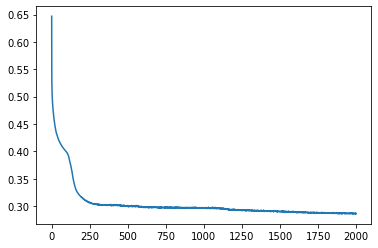

In [154]:
UnProcessedModel.train(0.35)
PreprocessedModel.train(0.35)

In [ ]:
UnProcessedModel.analyze()
PreprocessedModel.analyze()